<a href="https://colab.research.google.com/github/khailadhlia/Multivariate-Statistics/blob/TURF/TURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.0 MB/s eta 0:00:00


In [4]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [6]:
data_turf = pd.read_excel('/content/data TURF.xlsx')
data_turf.head()

,Id,Usia,Kendaraan,Lokasi 1,Lokasi 2,Lokasi 3,Lokasi 4,Lokasi 5,Lokasi 6,Lokasi 7,...,Lokasi 91,Lokasi 92,Lokasi 93,Lokasi 94,Lokasi 95,Lokasi 96,Lokasi 97,Lokasi 98,Lokasi 99,Lokasi 100
0,1.0,38.0,Skuter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,46.0,Jalan Kaki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,32.0,Sepeda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,60.0,Mobil Pribadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,25.0,Ojek Online,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
data_turf

,Id,Usia,Kendaraan,Lokasi 1,Lokasi 2,Lokasi 3,Lokasi 4,Lokasi 5,Lokasi 6,Lokasi 7,...,Lokasi 91,Lokasi 92,Lokasi 93,Lokasi 94,Lokasi 95,Lokasi 96,Lokasi 97,Lokasi 98,Lokasi 99,Lokasi 100
0,1.0,38.0,Skuter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,46.0,Jalan Kaki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,32.0,Sepeda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,60.0,Mobil Pribadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,25.0,Ojek Online,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199.0,49.0,Sepeda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
199,200.0,21.0,Mobil Pribadi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


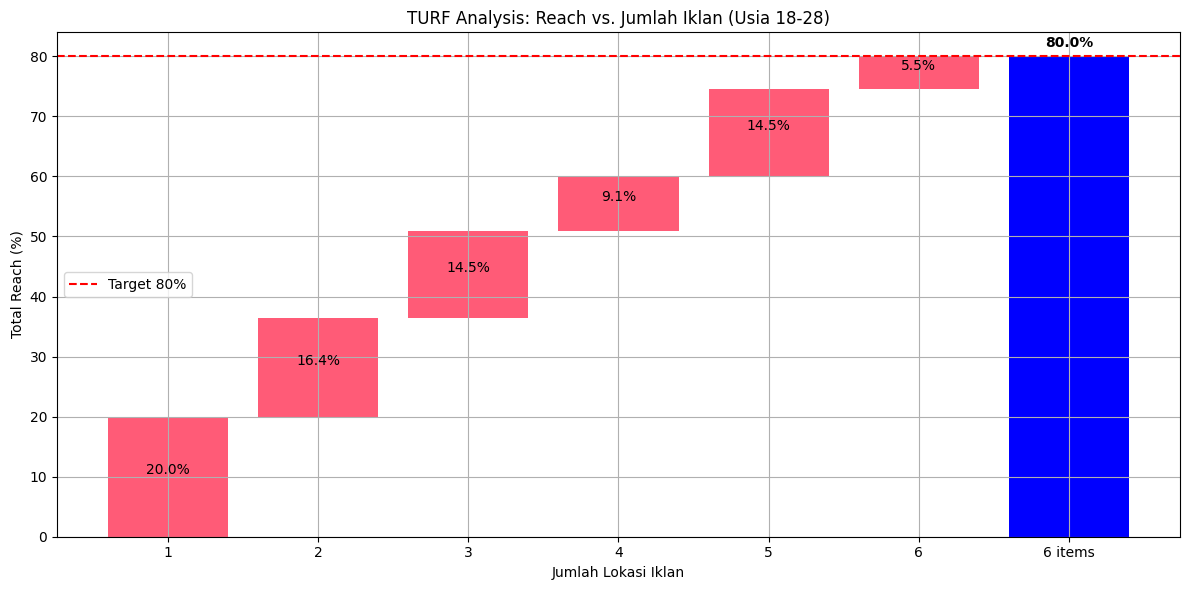


===== HASIL ANALISIS =====
Kategori usia       : 18-28
Target jangkauan    : 80%
Jumlah responden    : 55

✅ Target tercapai! Maksimum reach: 80.0%
Jumlah lokasi iklan yang dibutuhkan: 6

 Lokasi yang dipilih:
1. Lokasi 95
2. Lokasi 1
3. Lokasi 26
4. Lokasi 31
5. Lokasi 52
6. Lokasi 80


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# === BACA DATA ===
data = data_turf # @param

# === BUAT KATEGORI USIA ===
bins = [17, 28, 38, 48, 60]
labels = ["18-28", "29-38", "39-48", "49-60"]
data["kategori_usia"] = pd.cut(data["Usia"], bins=bins, labels=labels)

# === PARAMETER ===
kategori_usia = "18-28"  # @param ["18-28", "29-38", "39-48", "49-60"]
target_persen = 80       # @param

# === FILTER DATA SESUAI KATEGORI USIA ===
data_used = data[data["kategori_usia"] == kategori_usia].copy()
if data_used.empty:
    raise SystemExit(f"Tidak ada data untuk kategori usia '{kategori_usia}'.")

# === HITUNG TARGET REACH ===
target_reach = int((target_persen / 100) * len(data_used))

# === PROSES DATA LOKASI ===
lokasi_cols = [col for col in data_used.columns if "Lokasi" in col]
numeric_data = data_used[lokasi_cols].apply(pd.to_numeric, errors='coerce')

# === HITUNG REACH PER ITEM ===
reach_per_item = numeric_data.sum(axis=0).sort_values(ascending=False)

# === ALGORITMA GREEDY ===
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))
    if len(new_reach) >= target_reach:
        break
    current_reach = new_reach

# === HITUNG INCREMENTAL REACH ===
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))]

# === VISUALISASI ===
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=10)
    bottoms += inc * 100

plt.axhline(y=target_persen, color='r', linestyle='--', label=f"Target {target_persen}%")

# Tambahkan bar untuk total reach
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1] * 100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Jumlah Lokasi Iklan")
plt.ylabel("Total Reach (%)")
plt.title(f"TURF Analysis: Reach vs. Jumlah Iklan (Usia {kategori_usia})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === OUTPUT ===
max_reach = max(reach_progress)
max_reach_pct = max_reach * 100

print("\n===== HASIL ANALISIS =====")
print(f"Kategori usia       : {kategori_usia}")
print(f"Target jangkauan    : {target_persen}%")
print(f"Jumlah responden    : {len(data_used)}")

if max_reach >= target_persen / 100:
    print(f"\n✅ Target tercapai! Maksimum reach: {max_reach_pct:.1f}%")
    print(f"Jumlah lokasi iklan yang dibutuhkan: {len(selected_items)}")
else:
    print(f"\n❌ Target TIDAK tercapai.")
    print(f"  Maksimum yang bisa dicapai hanya {max_reach_pct:.1f}% dengan {len(selected_items)} lokasi.")

print("\n Lokasi yang dipilih:")
for i, loc in enumerate(selected_items, 1):
    print(f"{i}. {loc}")

Berdasarkan analisis TURF untuk kelompok usia 18-28 tahun, target jangkauan 80% berhasil dicapai dengan hanya 6 lokasi iklan dari total yang tersedia. Ini menunjukkan bahwa sebagian besar responden usia ini berkumpul pada lokasi-lokasi tertentu yang sangat strategis. Dengan demikian, pemasangan iklan cukup difokuskan pada lokasi-lokasi tersebut untuk efisiensi biaya dan peningkatan efektivitas kampanye.